In [2]:
from config import Configuration
import pandas as pd
import numpy as np
from util import cvt_coord_to_diagonal, intersection_over_union, cvt_coord_to_mid_point
import matplotlib.pyplot as plt
from k_means import KMeans
from mini_batch_kmeans import MiniBatchKMeans

In [2]:
#Generate CSV files for PASCAL voc data set
#!python script_csv_gen_bndbox.py data/pascal_voc/train data/pascal_voc/test train_pascal.csv test_pascal.csv

In [3]:
pascal_train_data = pd.read_csv('annotation_data/train_pascal_voc.csv')
pascal_train_data.head(10)

,image_path,label,xmin,ymin,xmax,ymax,xc,yc,w,h
0,.\data\pascal_voc\train\000005.jpg,chair,0.526,0.562667,0.648,0.904000,0.587,0.733333,0.122,0.341333
1,.\data\pascal_voc\train\000005.jpg,chair,0.330,0.704000,0.506,0.992000,0.418,0.848000,0.176,0.288000
2,.\data\pascal_voc\train\000005.jpg,chair,0.010,0.650667,0.134,0.997333,0.072,0.824000,0.124,0.346667
3,.\data\pascal_voc\train\000005.jpg,chair,0.482,0.517333,0.590,0.797333,0.536,0.657333,0.108,0.280000
4,.\data\pascal_voc\train\000005.jpg,chair,0.554,0.496000,0.624,0.586667,0.589,0.541333,0.070,0.090667
5,.\data\pascal_voc\train\000007.jpg,car,0.282,0.150150,1.000,0.990991,0.641,0.570571,0.718,0.840841
6,.\data\pascal_voc\train\000009.jpg,horse,0.138,0.458667,0.540,0.880000,0.339,0.669333,0.402,0.421333
7,.\data\pascal_voc\train\000009.jpg,person,0.300,0.376000,0.458,0.757333,0.379,0.566667,0.158,0.381333
8,.\data\pascal_voc\train\000009.jpg,person,0.570,0.536000,0.654,0.882667,0.612,0.709333,0.084,0.346667
9,.\data\pascal_voc\train\000009.jpg,person,0.516,0.528000,0.594,0.877333,0.555,0.702667,0.078,0.349333


In [4]:
pascal_test_data = pd.read_csv('annotation_data/test_pascal_voc.csv')
pascal_test_data.head(10)

,image_path,label,xmin,ymin,xmax,ymax,xc,yc,w,h
0,.\data\pascal_voc\train\000001.jpg,dog,0.135977,0.480000,0.552408,0.742000,0.344193,0.611000,0.416431,0.262000
1,.\data\pascal_voc\train\000001.jpg,person,0.022663,0.024000,0.997167,0.996000,0.509915,0.510000,0.974504,0.972000
2,.\data\pascal_voc\train\000002.jpg,train,0.414925,0.400000,0.617910,0.602000,0.516418,0.501000,0.202985,0.202000
3,.\data\pascal_voc\train\000003.jpg,sofa,0.246000,0.413333,0.430000,0.520000,0.338000,0.466667,0.184000,0.106667
4,.\data\pascal_voc\train\000003.jpg,chair,0.478000,0.416000,0.614000,0.546667,0.546000,0.481333,0.136000,0.130667
5,.\data\pascal_voc\train\000004.jpg,car,0.026000,0.766010,0.168000,0.891626,0.097000,0.828818,0.142000,0.125616
6,.\data\pascal_voc\train\000004.jpg,car,0.724000,0.812808,1.000000,0.958128,0.862000,0.885468,0.276000,0.145320
7,.\data\pascal_voc\train\000004.jpg,car,0.470000,0.807882,0.668000,0.923645,0.569000,0.865764,0.198000,0.115764
8,.\data\pascal_voc\train\000004.jpg,car,0.350000,0.805419,0.504000,0.896552,0.427000,0.850985,0.154000,0.091133
9,.\data\pascal_voc\train\000004.jpg,car,0.278000,0.788177,0.378000,0.884236,0.328000,0.836207,0.100000,0.096059


In [5]:
print('Total Bounding Boxes in train dataset: ', pascal_train_data.shape[0])
print('Total Bounding Boxes in test dataset: ', pascal_test_data.shape[0])

Total Bounding Boxes in train dataset:  15662
Total Bounding Boxes in test dataset:  14976


In [6]:
k_vs_iou_data = []

In [7]:
K = 3
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.4726212526193348, AvgIou: 0.5273787473806651


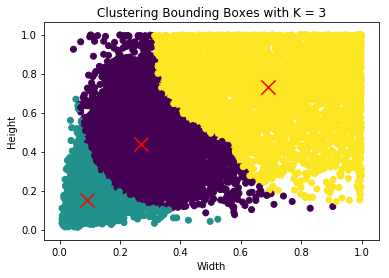

In [8]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [9]:
K = 5
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.4158598337288154, AvgIou: 0.5841401662711847


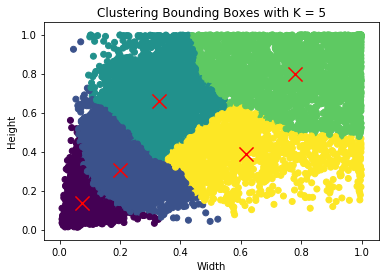

In [10]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [11]:
K = 7
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.3720100295763064, AvgIou: 0.6279899704236935


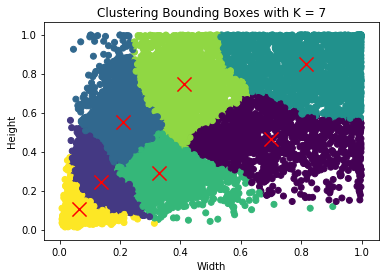

In [12]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [13]:
K = 9
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.34104259206023935, AvgIou: 0.6589574079397605


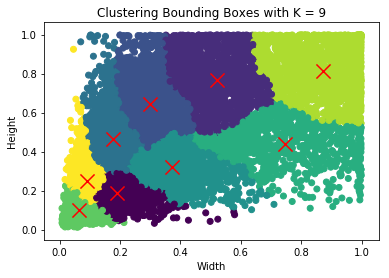

In [14]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [15]:
K = 11
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.3207608951440956, AvgIou: 0.6792391048559044


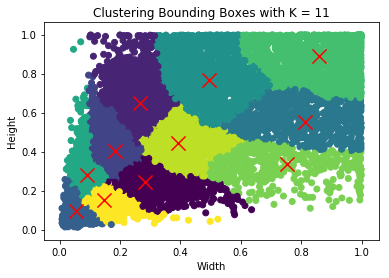

In [16]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [17]:
K = 13
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.3023169044245206, AvgIou: 0.6976830955754793


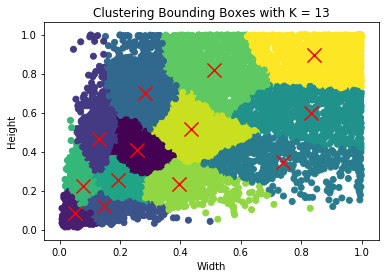

In [18]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [19]:
K = 15
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.28573520688247456, AvgIou: 0.7142647931175257


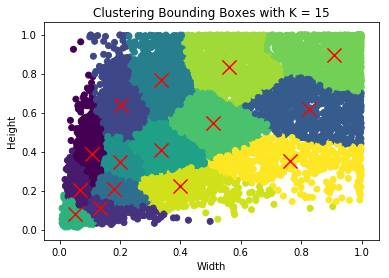

In [20]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [7]:
k_vs_iou_data =[(3, 0.5272683511711749),
 (5, 0.5881793194447844),
 (7, 0.6272229568875494),
 (9, 0.6597511134480362),
 (11, 0.6791186387306813),
 (13, 0.7007609259725441),
 (15, 0.7157899399278393),
 (17, 0.7276327043000521)]
k_vs_iou_data

[(3, 0.5272683511711749),
 (5, 0.5881793194447844),
 (7, 0.6272229568875494),
 (9, 0.6597511134480362),
 (11, 0.6791186387306813),
 (13, 0.7007609259725441),
 (15, 0.7157899399278393),
 (17, 0.7276327043000521)]

In [21]:
K = 17
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.27183341016750007, AvgIou: 0.7281665898324998


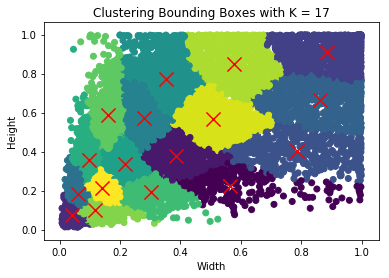

In [22]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [23]:
K = 19
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

Data has been fitted
 AvgError: 0.2585157651769609, AvgIou: 0.7414842348230392


In [24]:
k_vs_iou_data = np.array(k_vs_iou_data)

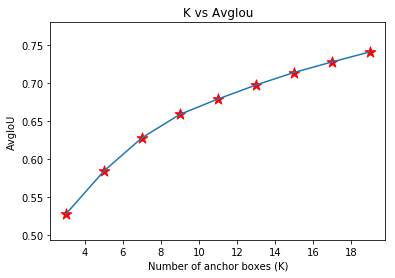

In [25]:
plt.xlabel('Number of anchor boxes (K)')
plt.ylabel('AvgIoU')
plt.title('K vs AvgIou')
plt.scatter(k_vs_iou_data[:,0],k_vs_iou_data[:,1],c='r',marker='*',s=128)
plt.plot(k_vs_iou_data[:,0],k_vs_iou_data[:,1])

In [53]:
from config import Configuration
import pandas as pd
import numpy as np
from util import cvt_coord_to_diagonal, intersection_over_union, cvt_coord_to_mid_point
import matplotlib.pyplot as plt
from k_means import KMeans
from mini_batch_kmeans import MiniBatchKMeans

In [54]:
leaf_train_data = pd.read_csv('annotation_data/train_leaf_data_v3.csv')
leaf_train_data.head(10)

,image_path,label,xmin,ymin,xmax,ymax,xc,yc,w,h
0,.\data\leaf_data_v3\train\sample_a_100.jpg,advanced,0.396825,0.382054,0.492063,0.519889,0.444444,0.450971,0.095238,0.137835
1,.\data\leaf_data_v3\train\sample_a_100.jpg,advanced,0.240896,0.483811,0.342670,0.578168,0.291783,0.530990,0.101774,0.094357
2,.\data\leaf_data_v3\train\sample_a_100.jpg,advanced,0.310924,0.635523,0.395892,0.736355,0.353408,0.685939,0.084967,0.100833
3,.\data\leaf_data_v3\train\sample_a_100.jpg,moderate,0.371615,0.303423,0.490196,0.401480,0.430906,0.352451,0.118581,0.098057
4,.\data\leaf_data_v3\train\sample_a_100.jpg,advanced,0.641457,0.333950,0.732960,0.418131,0.687208,0.376041,0.091503,0.084181
5,.\data\leaf_data_v3\train\sample_a_100.jpg,moderate,0.120448,0.898242,0.268908,1.000000,0.194678,0.949121,0.148459,0.101758
6,.\data\leaf_data_v3\train\sample_a_101.jpg,moderate,0.515625,0.758427,0.588619,0.907303,0.552122,0.832865,0.072994,0.148876
7,.\data\leaf_data_v3\train\sample_a_101.jpg,moderate,0.711521,0.543539,0.784282,0.698736,0.747901,0.621138,0.072761,0.155197
8,.\data\leaf_data_v3\train\sample_a_101.jpg,moderate,0.594216,0.531601,0.673274,0.699789,0.633745,0.615695,0.079058,0.168188
9,.\data\leaf_data_v3\train\sample_a_101.jpg,advanced,0.568797,0.261587,0.662780,0.391152,0.615788,0.326369,0.093983,0.129565


In [55]:
k_vs_iou_data = []

Data has been fitted
 AvgError: 0.34460354637979096, AvgIou: 0.655396453620209


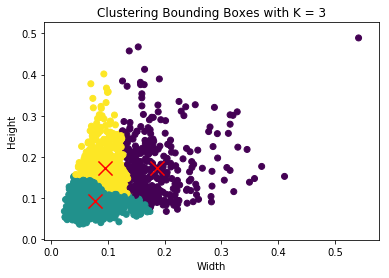

In [59]:
K = 3
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Data has been fitted
 AvgError: 0.28772536740603405, AvgIou: 0.7122746325939658


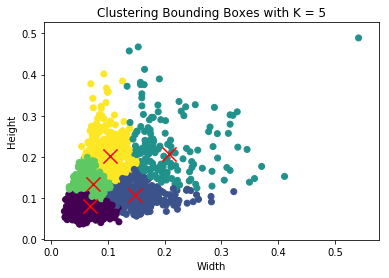

In [60]:
K = 5
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Data has been fitted
 AvgError: 0.28705416466929784, AvgIou: 0.7129458353307023


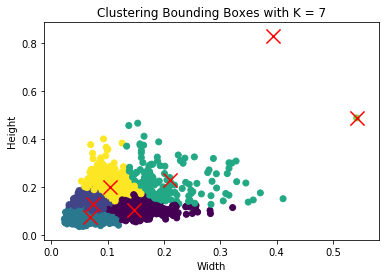

In [58]:
K = 7
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [63]:
k_means.cluster_vectors.reshape(-1)

array([0.06850829, 0.08018693, 0.14700889, 0.10872839, 0.20788386,
       0.20701152, 0.0744358 , 0.13469486, 0.10376921, 0.20329218])

In [62]:
k_means.cluster_vectors

array([[0.06850829, 0.08018693],
       [0.14700889, 0.10872839],
       [0.20788386, 0.20701152],
       [0.0744358 , 0.13469486],
       [0.10376921, 0.20329218]])

Data has been fitted
 AvgError: 0.2877302547393743, AvgIou: 0.7122697452606257


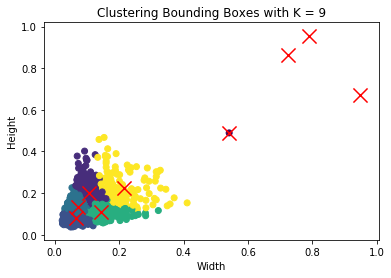

In [52]:
K = 9
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data,iteration_hist=False)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Iteration 1, AvgError: 0.7507180263941914, AvgIou: 0.2492819736058085
Iteration 2, AvgError: 0.4180327240114095, AvgIou: 0.5819672759885904
Iteration 3, AvgError: 0.4033500191903743, AvgIou: 0.5966499808096257
Iteration 4, AvgError: 0.3777655055623297, AvgIou: 0.6222344944376703
Iteration 5, AvgError: 0.35804804272655916, AvgIou: 0.6419519572734409
Iteration 6, AvgError: 0.33686014213171434, AvgIou: 0.6631398578682857
Iteration 7, AvgError: 0.3219333293048144, AvgIou: 0.6780666706951857
Iteration 8, AvgError: 0.33090579671913406, AvgIou: 0.6690942032808661
Iteration 9, AvgError: 0.31574692486374956, AvgIou: 0.6842530751362504
Iteration 10, AvgError: 0.3045959045155219, AvgIou: 0.6954040954844782
Iteration 11, AvgError: 0.30733836336531806, AvgIou: 0.6926616366346819
Iteration 12, AvgError: 0.3028181681304703, AvgIou: 0.6971818318695296
Iteration 13, AvgError: 0.29641419612599496, AvgIou: 0.703585803874005
Iteration 14, AvgError: 0.29658830775826955, AvgIou: 0.7034116922417303
Iteration

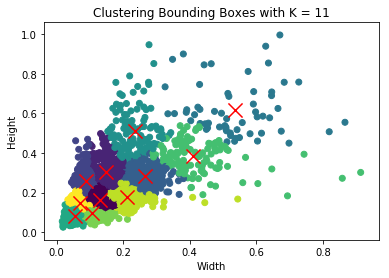

In [109]:
K = 11
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [117]:
k_vs_iou_data

array([[ 3.        ,  0.60161551],
       [ 5.        ,  0.6629281 ],
       [ 7.        ,  0.69978581],
       [ 9.        ,  0.71299751],
       [11.        ,  0.746564  ],
       [13.        ,  0.75129917],
       [15.        ,  0.77260912],
       [17.        ,  0.77799703]])

Iteration 1, AvgError: 0.37545139371257036, AvgIou: 0.6245486062874297
Iteration 2, AvgError: 0.3099027553527497, AvgIou: 0.6900972446472506
Iteration 3, AvgError: 0.297069203943498, AvgIou: 0.7029307960565021
Iteration 4, AvgError: 0.29146335192276174, AvgIou: 0.7085366480772385
Iteration 5, AvgError: 0.29613992107421494, AvgIou: 0.7038600789257851
Iteration 6, AvgError: 0.29172137249351193, AvgIou: 0.7082786275064881
Iteration 7, AvgError: 0.2912836591061662, AvgIou: 0.7087163408938338
Iteration 8, AvgError: 0.28137088040332475, AvgIou: 0.7186291195966752
Iteration 9, AvgError: 0.2915138978911352, AvgIou: 0.7084861021088648
Iteration 10, AvgError: 0.2848361165896117, AvgIou: 0.7151638834103883
Iteration 11, AvgError: 0.2792047288369467, AvgIou: 0.7207952711630533
Iteration 12, AvgError: 0.2772369999034762, AvgIou: 0.7227630000965239
Iteration 13, AvgError: 0.27630272497298297, AvgIou: 0.7236972750270172
Iteration 14, AvgError: 0.2774622713308653, AvgIou: 0.7225377286691347
Iteration 

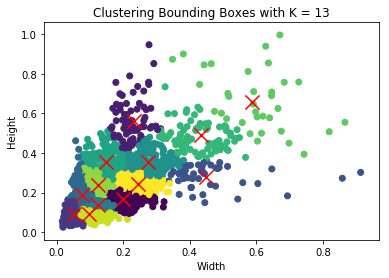

In [111]:
K = 13
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Iteration 1, AvgError: 0.44204921157728827, AvgIou: 0.5579507884227116
Iteration 2, AvgError: 0.37327859346593173, AvgIou: 0.6267214065340683
Iteration 3, AvgError: 0.36264128804711265, AvgIou: 0.6373587119528871
Iteration 4, AvgError: 0.34534579041497715, AvgIou: 0.654654209585023
Iteration 5, AvgError: 0.33346716943791604, AvgIou: 0.666532830562084
Iteration 6, AvgError: 0.31386089881377277, AvgIou: 0.6861391011862275
Iteration 7, AvgError: 0.31098623265715, AvgIou: 0.68901376734285
Iteration 8, AvgError: 0.3125224424665528, AvgIou: 0.6874775575334472
Iteration 9, AvgError: 0.3040733667068413, AvgIou: 0.6959266332931586
Iteration 10, AvgError: 0.3032314533422753, AvgIou: 0.6967685466577245
Iteration 11, AvgError: 0.2989792140653471, AvgIou: 0.701020785934653
Iteration 12, AvgError: 0.30443029663380955, AvgIou: 0.6955697033661904
Iteration 13, AvgError: 0.2921181911167626, AvgIou: 0.7078818088832375
Iteration 14, AvgError: 0.2832307500421412, AvgIou: 0.7167692499578588
Iteration 15, A

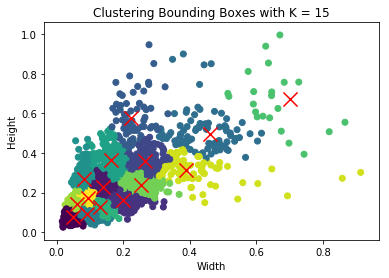

In [112]:
K = 15
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Iteration 1, AvgError: 0.6442386122492589, AvgIou: 0.355761387750741
Iteration 2, AvgError: 0.348081376158813, AvgIou: 0.6519186238411869
Iteration 3, AvgError: 0.3183046119286715, AvgIou: 0.6816953880713286
Iteration 4, AvgError: 0.3008586601483744, AvgIou: 0.6991413398516256
Iteration 5, AvgError: 0.29112093779169196, AvgIou: 0.708879062208308
Iteration 6, AvgError: 0.286105113857508, AvgIou: 0.713894886142492
Iteration 7, AvgError: 0.2790983183276018, AvgIou: 0.7209016816723982
Iteration 8, AvgError: 0.27523025721112154, AvgIou: 0.7247697427888785
Iteration 9, AvgError: 0.2695262441259274, AvgIou: 0.7304737558740725
Iteration 10, AvgError: 0.2675925759314741, AvgIou: 0.732407424068526
Iteration 11, AvgError: 0.2653888466481147, AvgIou: 0.7346111533518854
Iteration 12, AvgError: 0.2593597988268906, AvgIou: 0.7406402011731094
Iteration 13, AvgError: 0.2572553024465655, AvgIou: 0.7427446975534344
Iteration 14, AvgError: 0.2609090291006556, AvgIou: 0.7390909708993444
Iteration 15, AvgEr

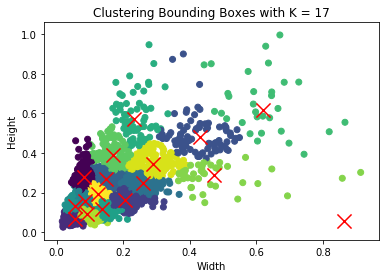

In [122]:
K = 17
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

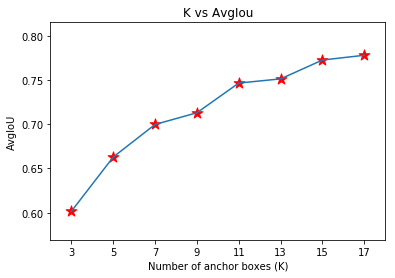

In [114]:
k_vs_iou_data = np.array(k_vs_iou_data)
plt.xlabel('Number of anchor boxes (K)')
plt.ylabel('AvgIoU')
plt.xticks(ticks=k_vs_iou_data[:,0])
plt.title('K vs AvgIou')
plt.scatter(k_vs_iou_data[:,0],k_vs_iou_data[:,1],c='r',marker='*',s=128)
plt.plot(k_vs_iou_data[:,0],k_vs_iou_data[:,1])

In [115]:
k_vs_iou_data

array([[ 3.        ,  0.60161551],
       [ 5.        ,  0.6629281 ],
       [ 7.        ,  0.69978581],
       [ 9.        ,  0.71299751],
       [11.        ,  0.746564  ],
       [13.        ,  0.75129917],
       [15.        ,  0.77260912],
       [17.        ,  0.77799703]])